<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Online_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as  go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
data=pd.read_csv("onlinefoods.csv")
print(data.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


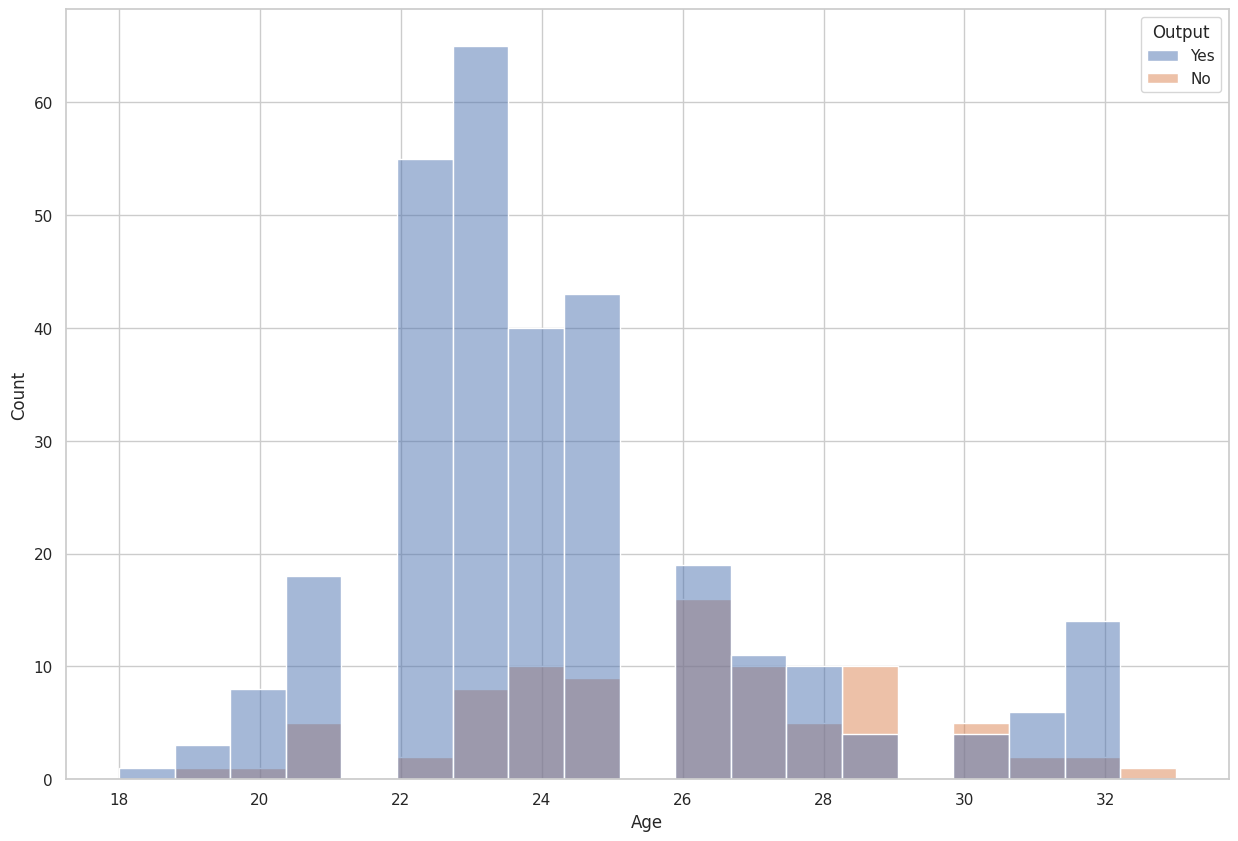

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x="Age",hue='Output',data=data)
plt.show()

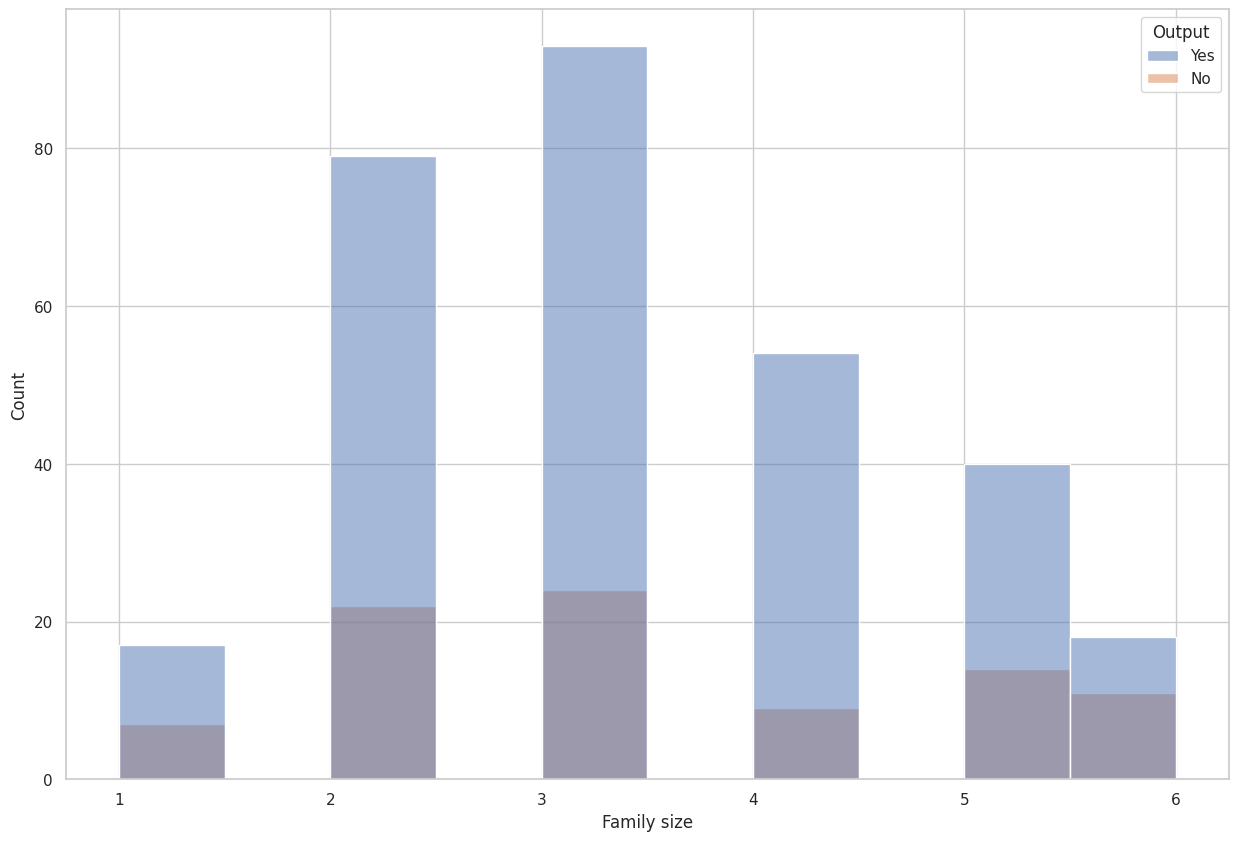

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x='Family size',hue='Output',data=data)
plt.show()

In [ ]:
buying_again_data=data.query("Output == 'Yes'")
print(buying_again_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [ ]:
gender=buying_again_data['Gender'].value_counts()
labels=gender.index
counts=gender.values
colors=['gold','lightgreen']

fig=go.Figure(data=[go.Pie(labels=labels,values=counts)])
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30,
                  marker=dict(colors=colors,line=dict(color='black',width=3)))
fig.show()

In [ ]:
martial=buying_again_data['Marital Status'].value_counts()
labels=martial.index
counts=martial.values
colors=['gold','lightgreen']

fig=go.Figure(data=[go.Pie(labels=labels,values=counts)])
fig.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30,
                  marker=dict(colors=colors,line=dict(color='black',width=3)))
fig.show()

In [ ]:
data['Gender']= data['Gender'].map({"Male": 1,
                                    "Female": 0})
data['Marital Status'] =data['Marital Status'].map({"Married": 2,
                                                    "Single":1,
                                                    "Prefer not to say":0})
data['Occupation']=data['Occupation'].map({"Student": 1,
                                           "Employee": 2,
                                           "Self Employeed": 3,
                                           "House wife": 4})
data['Educational Qualifications'] =data['Educational Qualifications'].map({"Graduate": 1,
                                                                        "Post Graduate": 2,
                                                                        "Ph.D": 3,"School": 4,
                                                                        "Uneducated": 5})
data["Monthly Income"]=data['Monthly Income'].map({"No Income": 0,
                                                   "25001 to 50000": 5000,
                                                   "More than 50000": 7000,
                                                   "10001 to 25000": 25000,
                                                   "Below Rs.10000": 10000})
data['Feedback']=data['Feedback'].map({"Positive": 1,"Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [ ]:
from sklearn.model_selection import train_test_split
x=np.array([["Age","Gender","Marital Status","Occupation",
             "Monthly Income","Educational Qualifications"]]),
          #  "Family size","Pin code","Feedback"]])
y=np.array([["Output"]])

from sklearn.ensemble import RandomForestClassifier
xtrain,xtest,ytrain,ytest = train_test_split(x , y ,test_size=0.10, random_state=42)
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

NameError: ignored

In [ ]:
print("enter  CUSTOMER detail  to predict if the customer will order again")
a=int(input("enter thhe age of the customer"))
b=int(input("enter the gender  of the customer(1=male,0=female):"))
c=int(input("Martial stsue of the customer(Married: 2,Single:1,Prefer not to say:0)"))
d=int(input("Occupation of the customer(Student: 1,Employee: 2,Self Employeed: 3,House wife: 4)"))
e=int(input("Educational of the customer(Graduate: 1,Post Graduate: 2,Ph.D:3,School:4,Uneducated:5)"))
f=int(input("Monthly Income of the customer(No Income:0,25001 to 50000: 5000,More than 50000: 7000,10001 to 25000:25000, Below Rs.10000: 10000)"))
g=int(input("Feedback og the cutomer(Positive: 1,Negative: 0)"))
features=np.array([a,b,c,d,e,f,g])
output =model.predict(features)
print(output)

enter  CUSTOMER detail  to predict if the customer will order again
enter thhe age of the customer45
enter the gender  of the customer(1=male,0=female):0
Martial stsue of the customer(Married: 2,Single:1,Prefer not to say:0)1
Occupation of the customer(Student: 1,Employee: 2,Self Employeed: 3,House wife: 4)2
Educational of the customer(Graduate: 1,Post Graduate: 2,Ph.D:3,School:4,Uneducated:5)3
Monthly Income of the customer(No Income:0,25001 to 50000: 5000,More than 50000: 7000,10001 to 25000:25000, Below Rs.10000: 10000)50000
Feedback og the cutomer(Positive: 1,Negative: 0)1


NotFittedError: ignored